# Определение стоимости автомобилей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Скорость-работы" data-toc-modified-id="Скорость-работы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Скорость работы</a></span><ul class="toc-item"><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Линейная регрессия</a></span></li></ul></li><li><span><a href="#Качество-результатов" data-toc-modified-id="Качество-результатов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Качество результатов</a></span></li><li><span><a href="#Сравнение" data-toc-modified-id="Сравнение-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сравнение</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

Необходимо разработать модель для расчета стоимости автомобиля.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## Подготовка данных

In [2]:
data = pd.read_csv('autos.csv')

In [3]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [6]:
data['Model'].fillna('n/a', inplace=True)
data['NotRepaired'].fillna('n/a', inplace=True)
data['VehicleType'].fillna('n/a', inplace=True)
data['Gearbox'].fillna('n/a', inplace=True)
data['FuelType'].fillna('n/a', inplace=True)

Обработка нулевых значений

In [7]:
numeric_columns = ['Price', 'RegistrationYear', 'Power', 'Kilometer']
for column in numeric_columns:
    print(f'{column}: {data[data[column] <= 0][column].count()} нулевых значений')

Price: 10772 нулевых значений
RegistrationYear: 0 нулевых значений
Power: 40225 нулевых значений
Kilometer: 0 нулевых значений


С пропусками в `Price` поделать ничего не получиться, потому что это целевой признак. Нулевые значения в `Power` можно заполнить средним среди таких же моделей автомобилей.

In [8]:
def fix_power(data):
    power_pivot = data.pivot_table(index=['Brand', 'Model'], values=['Power'], aggfunc='mean')

    
    def get_mean_power(row):
        power = row['Power']
        brand = row['Brand']
        model = row['Model']
        if(power > 0):
            return power
   
        return int(power_pivot.loc[(brand, model)].values[0])
        
    
    data['Power'] = data.apply(get_mean_power, axis=1)

fix_power(data)

В выборке множество автомобилей, которые прибыли из будущего либо были созданы, когда автомобилей еще не существовало. Исправить это можно по аналогии с тем, как была исправлена мощность автомобилей.

In [9]:
def fix_reg_year(data):
    appropriate_reg_year_dates = data.query('1900 < RegistrationYear < 2022')
    year_pivot = appropriate_reg_year_dates.pivot_table(index=['Brand', 'Model'], values=['RegistrationYear'], aggfunc='mean')

    
    def get_mean_year(row):
        year = row['RegistrationYear']
        brand = row['Brand']
        model = row['Model']
        if(1900 < year < 2022):
            return year
   
        return int(year_pivot.loc[(brand, model)].values[0])
        
    
    data['RegistrationYear'] = data.apply(get_mean_year, axis=1)

fix_reg_year(data)

In [10]:
"""Метод для удаления выбросов согласно ящику с усами"""

def remove_outliners(data, columns):
    for column in columns:
        bottom = data[column].quantile(.25)
        top = data[column].quantile(.75)
        IQR = top - bottom
        bottom -= 1.5*IQR
        top += 1.5*IQR
        data = data[(data[column] > bottom) & (data[column] < top)]
    return data

In [11]:
data = remove_outliners(data, ['Price', 'Power'])

In [12]:
data = data.query('Price > 0')

Теперь в данных нет пропусков.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318054 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        318054 non-null  object
 1   Price              318054 non-null  int64 
 2   VehicleType        318054 non-null  object
 3   RegistrationYear   318054 non-null  int64 
 4   Gearbox            318054 non-null  object
 5   Power              318054 non-null  int64 
 6   Model              318054 non-null  object
 7   Kilometer          318054 non-null  int64 
 8   RegistrationMonth  318054 non-null  int64 
 9   FuelType           318054 non-null  object
 10  Brand              318054 non-null  object
 11  NotRepaired        318054 non-null  object
 12  DateCreated        318054 non-null  object
 13  NumberOfPictures   318054 non-null  int64 
 14  PostalCode         318054 non-null  int64 
 15  LastSeen           318054 non-null  object
dtypes: int64(7), object(

## Обучение моделей

In [14]:
features = ['VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
           'Kilometer', 'FuelType', 'Brand', 'NotRepaired']
target = 'Price'

In [15]:
categorical_features = [
    'VehicleType', 'Gearbox', 'Model', 'Brand', 'FuelType', 'NotRepaired'
]
cat_data = data[categorical_features].values
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_data)
cat_data_transformed = ohe.transform(cat_data).toarray()
print(cat_data_transformed.shape)
print(ohe.inverse_transform(cat_data_transformed)[0])

numeric_features = ['RegistrationYear', 'Power', 'Kilometer']
numeric_data = data[numeric_features].values

features = np.concatenate((numeric_data, cat_data_transformed),
                          axis=1)
target = data[target].values


features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=.4, random_state=12345)


scaler = StandardScaler()
scaler.fit(features_train[:, 0:3])
features_train[:, 0:3] = scaler.transform(features_train[:, 0:3])
features_valid[:, 0:3] = scaler.transform(features_valid[:, 0:3])
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345
)

(318054, 312)
['n/a' 'manual' 'golf' 'volkswagen' 'petrol' 'n/a']


### Линейная регрессия

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(features_train, target_train)
prediction = lr.predict(features_test)
mean_squared_error(target_test, prediction)**0.5

2095.122721521819

### LightGBM

In [17]:
import lightgbm as lgb

In [18]:
num_round = 1000
param = {
    'num_leaves': 31, 
    'objective': 'regression',
    'metric': 'rmse'
}

train_data = lgb.Dataset(features_train, target_train)
valid_data = lgb.Dataset(features_valid, target_valid)
eval_result = dict()

bst = lgb.train(param, train_data, num_round, valid_sets=[valid_data], verbose_eval=200, callbacks=[lgb.record_evaluation(eval_result)])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 190832, number of used features: 286
[LightGBM] [Info] Start training from score 3749.550552
[200]	valid_0's rmse: 1380.97
[400]	valid_0's rmse: 1349.31
[600]	valid_0's rmse: 1333.75
[800]	valid_0's rmse: 1324.36
[1000]	valid_0's rmse: 1317.61


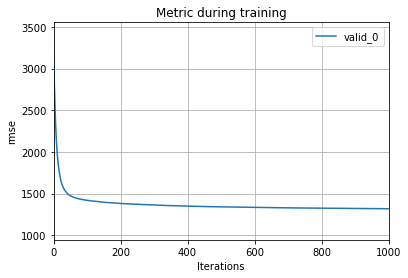

In [19]:
lgb.plot_metric(eval_result, 'rmse')

### CatBoost

In [20]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=8)

model.fit(features_train, target_train)

preds = model.predict(features_valid)

0:	learn: 3185.4060741	total: 80.9ms	remaining: 1m 20s
1:	learn: 2987.5829322	total: 96ms	remaining: 47.9s
2:	learn: 2824.2189069	total: 111ms	remaining: 36.9s
3:	learn: 2675.6944727	total: 127ms	remaining: 31.6s
4:	learn: 2547.2419640	total: 143ms	remaining: 28.4s
5:	learn: 2434.2947189	total: 158ms	remaining: 26.2s
6:	learn: 2335.0960450	total: 173ms	remaining: 24.6s
7:	learn: 2249.2893728	total: 189ms	remaining: 23.4s
8:	learn: 2172.5723154	total: 204ms	remaining: 22.5s
9:	learn: 2107.5812965	total: 220ms	remaining: 21.8s
10:	learn: 2050.7628138	total: 235ms	remaining: 21.2s
11:	learn: 1999.7864417	total: 251ms	remaining: 20.7s
12:	learn: 1954.4362225	total: 267ms	remaining: 20.2s
13:	learn: 1916.6155601	total: 283ms	remaining: 19.9s
14:	learn: 1882.1240249	total: 297ms	remaining: 19.5s
15:	learn: 1850.2437725	total: 313ms	remaining: 19.2s
16:	learn: 1821.9031276	total: 328ms	remaining: 19s
17:	learn: 1792.4953726	total: 344ms	remaining: 18.8s
18:	learn: 1770.2312098	total: 359ms	re

156:	learn: 1395.7616198	total: 2.51s	remaining: 13.5s
157:	learn: 1394.7138339	total: 2.52s	remaining: 13.4s
158:	learn: 1394.0378590	total: 2.54s	remaining: 13.4s
159:	learn: 1393.4853236	total: 2.55s	remaining: 13.4s
160:	learn: 1392.7369839	total: 2.57s	remaining: 13.4s
161:	learn: 1392.3846133	total: 2.58s	remaining: 13.4s
162:	learn: 1391.6293469	total: 2.6s	remaining: 13.3s
163:	learn: 1391.2389166	total: 2.61s	remaining: 13.3s
164:	learn: 1390.7200885	total: 2.63s	remaining: 13.3s
165:	learn: 1390.2644589	total: 2.64s	remaining: 13.3s
166:	learn: 1389.7568359	total: 2.66s	remaining: 13.3s
167:	learn: 1389.3658852	total: 2.67s	remaining: 13.2s
168:	learn: 1388.6700430	total: 2.69s	remaining: 13.2s
169:	learn: 1387.9412486	total: 2.71s	remaining: 13.2s
170:	learn: 1387.4457512	total: 2.72s	remaining: 13.2s
171:	learn: 1386.9500080	total: 2.73s	remaining: 13.2s
172:	learn: 1386.6132597	total: 2.75s	remaining: 13.1s
173:	learn: 1386.0620766	total: 2.76s	remaining: 13.1s
174:	learn:

312:	learn: 1331.6586994	total: 4.89s	remaining: 10.7s
313:	learn: 1331.4552350	total: 4.9s	remaining: 10.7s
314:	learn: 1331.1987439	total: 4.92s	remaining: 10.7s
315:	learn: 1330.9301252	total: 4.93s	remaining: 10.7s
316:	learn: 1330.6649285	total: 4.95s	remaining: 10.7s
317:	learn: 1330.3982733	total: 4.96s	remaining: 10.6s
318:	learn: 1330.2004273	total: 4.97s	remaining: 10.6s
319:	learn: 1329.9238134	total: 4.99s	remaining: 10.6s
320:	learn: 1329.7032519	total: 5s	remaining: 10.6s
321:	learn: 1329.5068010	total: 5.02s	remaining: 10.6s
322:	learn: 1329.1033502	total: 5.04s	remaining: 10.6s
323:	learn: 1328.7667945	total: 5.05s	remaining: 10.5s
324:	learn: 1328.3982490	total: 5.07s	remaining: 10.5s
325:	learn: 1328.1022392	total: 5.08s	remaining: 10.5s
326:	learn: 1327.8419662	total: 5.1s	remaining: 10.5s
327:	learn: 1327.6082608	total: 5.11s	remaining: 10.5s
328:	learn: 1327.3782989	total: 5.13s	remaining: 10.5s
329:	learn: 1327.1540503	total: 5.14s	remaining: 10.4s
330:	learn: 132

469:	learn: 1296.1454513	total: 7.26s	remaining: 8.19s
470:	learn: 1296.0285612	total: 7.28s	remaining: 8.18s
471:	learn: 1295.8811158	total: 7.29s	remaining: 8.16s
472:	learn: 1295.6748526	total: 7.31s	remaining: 8.14s
473:	learn: 1295.5807080	total: 7.32s	remaining: 8.13s
474:	learn: 1295.3761405	total: 7.34s	remaining: 8.11s
475:	learn: 1295.1825612	total: 7.36s	remaining: 8.1s
476:	learn: 1295.0179608	total: 7.37s	remaining: 8.08s
477:	learn: 1294.8777826	total: 7.38s	remaining: 8.06s
478:	learn: 1294.8093781	total: 7.4s	remaining: 8.05s
479:	learn: 1294.6787926	total: 7.41s	remaining: 8.03s
480:	learn: 1294.5369995	total: 7.43s	remaining: 8.02s
481:	learn: 1294.4366184	total: 7.44s	remaining: 8s
482:	learn: 1294.2936480	total: 7.46s	remaining: 7.98s
483:	learn: 1294.0810452	total: 7.47s	remaining: 7.97s
484:	learn: 1293.8897718	total: 7.49s	remaining: 7.95s
485:	learn: 1293.6860400	total: 7.5s	remaining: 7.94s
486:	learn: 1293.4258048	total: 7.52s	remaining: 7.92s
487:	learn: 1293

624:	learn: 1270.0918215	total: 9.65s	remaining: 5.79s
625:	learn: 1269.9575744	total: 9.66s	remaining: 5.77s
626:	learn: 1269.7165429	total: 9.68s	remaining: 5.76s
627:	learn: 1269.5714617	total: 9.69s	remaining: 5.74s
628:	learn: 1269.4015957	total: 9.71s	remaining: 5.73s
629:	learn: 1269.1744875	total: 9.73s	remaining: 5.71s
630:	learn: 1269.0232463	total: 9.74s	remaining: 5.7s
631:	learn: 1268.8957687	total: 9.76s	remaining: 5.68s
632:	learn: 1268.8429991	total: 9.77s	remaining: 5.67s
633:	learn: 1268.7124808	total: 9.79s	remaining: 5.65s
634:	learn: 1268.5586373	total: 9.8s	remaining: 5.63s
635:	learn: 1268.4620099	total: 9.82s	remaining: 5.62s
636:	learn: 1268.3693089	total: 9.83s	remaining: 5.6s
637:	learn: 1268.3145189	total: 9.85s	remaining: 5.59s
638:	learn: 1268.2391184	total: 9.86s	remaining: 5.57s
639:	learn: 1268.0828753	total: 9.88s	remaining: 5.56s
640:	learn: 1267.8764693	total: 9.89s	remaining: 5.54s
641:	learn: 1267.7561044	total: 9.91s	remaining: 5.53s
642:	learn: 1

780:	learn: 1250.2951841	total: 12s	remaining: 3.38s
781:	learn: 1250.1889936	total: 12.1s	remaining: 3.36s
782:	learn: 1250.0691580	total: 12.1s	remaining: 3.34s
783:	learn: 1249.9485092	total: 12.1s	remaining: 3.33s
784:	learn: 1249.8213540	total: 12.1s	remaining: 3.31s
785:	learn: 1249.5560283	total: 12.1s	remaining: 3.3s
786:	learn: 1249.4112604	total: 12.1s	remaining: 3.28s
787:	learn: 1249.3195744	total: 12.1s	remaining: 3.27s
788:	learn: 1249.2264250	total: 12.2s	remaining: 3.25s
789:	learn: 1249.1607261	total: 12.2s	remaining: 3.23s
790:	learn: 1249.0639150	total: 12.2s	remaining: 3.22s
791:	learn: 1248.9561297	total: 12.2s	remaining: 3.2s
792:	learn: 1248.8694757	total: 12.2s	remaining: 3.19s
793:	learn: 1248.7970524	total: 12.2s	remaining: 3.17s
794:	learn: 1248.7395640	total: 12.2s	remaining: 3.16s
795:	learn: 1248.5670499	total: 12.3s	remaining: 3.14s
796:	learn: 1248.5272750	total: 12.3s	remaining: 3.13s
797:	learn: 1248.3643965	total: 12.3s	remaining: 3.11s
798:	learn: 12

935:	learn: 1233.4464002	total: 14.4s	remaining: 986ms
936:	learn: 1233.3786272	total: 14.4s	remaining: 971ms
937:	learn: 1233.2985067	total: 14.4s	remaining: 955ms
938:	learn: 1233.2538113	total: 14.5s	remaining: 940ms
939:	learn: 1233.1797419	total: 14.5s	remaining: 924ms
940:	learn: 1233.0755088	total: 14.5s	remaining: 909ms
941:	learn: 1232.9715220	total: 14.5s	remaining: 893ms
942:	learn: 1232.8683218	total: 14.5s	remaining: 878ms
943:	learn: 1232.7974335	total: 14.5s	remaining: 863ms
944:	learn: 1232.6192453	total: 14.6s	remaining: 847ms
945:	learn: 1232.5327189	total: 14.6s	remaining: 832ms
946:	learn: 1232.4782284	total: 14.6s	remaining: 816ms
947:	learn: 1232.4128450	total: 14.6s	remaining: 801ms
948:	learn: 1232.3178309	total: 14.6s	remaining: 786ms
949:	learn: 1232.2416438	total: 14.6s	remaining: 770ms
950:	learn: 1232.0906749	total: 14.6s	remaining: 755ms
951:	learn: 1231.9959791	total: 14.7s	remaining: 739ms
952:	learn: 1231.8827470	total: 14.7s	remaining: 724ms
953:	learn

In [21]:
mean_squared_error(target_valid, preds)**0.5

1325.6247959631382

### RandomForestRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=12345, max_depth=5, max_leaf_nodes=60, n_estimators=200, n_jobs=-1)
rfr.fit(features_train, target_train)
preds = rfr.predict(features_valid)
mean_squared_error(target_valid, preds)**0.5

1960.6912096152655

## Анализ моделей

### Скорость работы

#### RandomForestRegressor

In [23]:
%timeit rfr.predict(features_valid)

149 ms ± 4.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### CatBoost

In [24]:
%timeit model.predict(features_valid)

5.35 s ± 89.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### LightGBM

In [25]:
%timeit bst.predict(features_valid)

409 ms ± 5.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Линейная регрессия

In [26]:
%timeit lr.predict(features_valid)

24.7 ms ± 61.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Качество результатов

In [27]:
models = [rfr, model, bst, lr]
labels = ['RandomForestRegressor', 'CatBoost', 'LightGBM', 'Линейная регрессия']
for m in zip(models, labels):
    preds = m[0].predict(features_test)
    print(f'{m[1]}: {mean_squared_error(target_test, preds)**0.5 : .3f}')

RandomForestRegressor:  1947.626
CatBoost:  1329.109
LightGBM:  1321.831
Линейная регрессия:  2095.123


### Сравнение

In [28]:
pd.DataFrame({'Скорость работы, секунд': [0.145, 5.19, 0.431, 0.0239],
             'RMSE': [1947, 1329, 1321, 2095]}, index=['RandomForestRegressor', 'CatBoost', 'LightGBM', 'Линейная регрессия'])

,"Скорость работы, секунд",RMSE
RandomForestRegressor,0.1450,1947
CatBoost,5.1900,1329
LightGBM,0.4310,1321
Линейная регрессия,0.0239,2095


Лучшая модель по сумме показателей: LightGBM. Скорость её работы лучше, чем у CatBoost и RandomForestRegressor и выше точность предсказаний.